In [10]:
#!pip install --upgrade pip

In [11]:
#!pip install torch
#!pip install torchvision

In [12]:
#!pip install torchsummary

In [13]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes

import torch                    # Pytorch module 
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders 
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors 
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchsummary import summary              # for getting the summary of our model

%matplotlib inline

In [14]:
#!pip install patool 

In [15]:
#!pip install unzip

In [16]:
#!pip install zipfile36
from zipfile import ZipFile


In [17]:
#with ZipFile("/Users/ananya/Documents/GitHub/Krishisewa/archive.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    #zObject.extractall(
       # path="/Users/ananya/Documents/GitHub/Krishisewa")

# LOADING THE DATASET

In [18]:

train_dir = "/Users/ananya/Documents/GitHub/Krishisewa/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_dir = "/Users/ananya/Documents/GitHub/Krishisewa/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
diseases = os.listdir(train_dir)

In [19]:
print(diseases)

['Strawberry___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Blueberry___healthy', 'Corn_(maize)___healthy', 'Tomato___Target_Spot', 'Peach___healthy', 'Potato___Late_blight', 'Tomato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Pepper,_bell___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Leaf_Mold', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Cherry_(including_sour)___Powdery_mildew', 'Apple___Cedar_apple_rust', 'Tomato___Bacterial_spot', 'Grape___healthy', 'Tomato___Early_blight', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___healthy', 'Cherry_(including_sour)___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Apple___Apple_scab', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Peach___Bacterial_spot', 'Pepper,_bell___Bacterial_spot', 'Tomato___Septoria_leaf_spot', 'Squash___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Apple___B

In [20]:
print("Total disease classes are: {}".format(len(diseases)))

Total disease classes are: 38


The above cell extract the number of unique plants and number of unique diseases

In [21]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

In [22]:
# unique plants in the dataset
print(f"Unique Plants are: \n{plants}")

# number of unique plants
print("Number of plants: {}".format(len(plants)))

Unique Plants are: 
['Strawberry', 'Grape', 'Potato', 'Blueberry', 'Corn_(maize)', 'Tomato', 'Peach', 'Pepper,_bell', 'Orange', 'Cherry_(including_sour)', 'Apple', 'Raspberry', 'Squash', 'Soybean']
Number of plants: 14


In [23]:
print("Number of Diseases: ".format(NumberOfDiseases))

Number of Diseases: 


In [24]:
# Number of images for each disease
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

,no. of images
Strawberry___healthy,1824
Grape___Black_rot,1888
Potato___Early_blight,1939
Blueberry___healthy,1816
Corn_(maize)___healthy,1859
Tomato___Target_Spot,1827
Peach___healthy,1728
Potato___Late_blight,1939
Tomato___Late_blight,1851
Tomato___Tomato_mosaic_virus,1790


Visualizing the above on a graph

Text(0.5, 1.0, 'Images per each class of plant disease')

<Figure size 1800x1080 with 0 Axes>

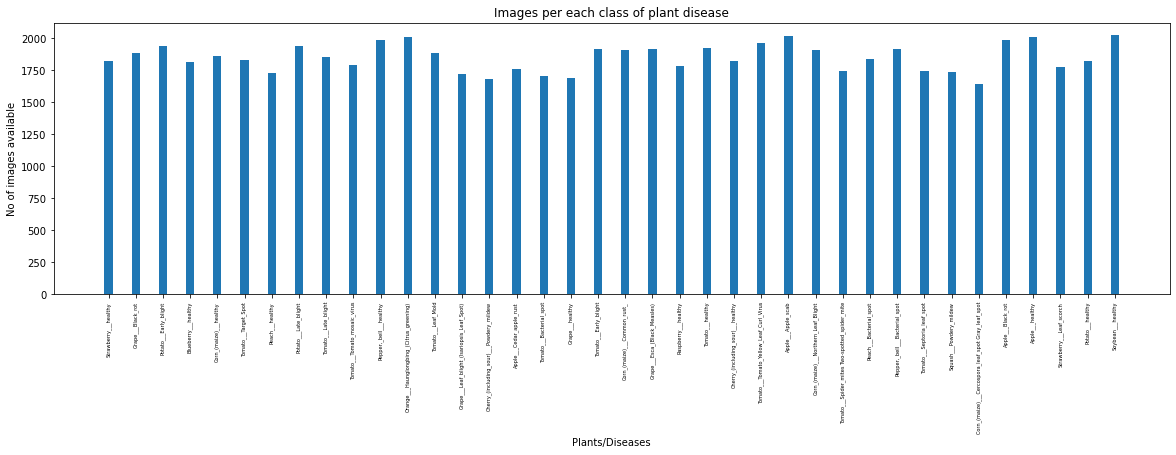

In [25]:
# plotting number of images available for each disease
plt.figure(figsize = (25,15))
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

In [26]:
n_train = 0
for value in nums.values():
    n_train += value
print(f"There are {n_train} images for training")

There are 70295 images for training


#  Data Preparation for Training 

In [27]:
# datasets for validation and training
from torchvision.datasets import ImageFolder
train = ImageFolder(train_dir, transform=transforms.ToTensor())
valid = ImageFolder(valid_dir, transform=transforms.ToTensor()) 

In [28]:
# Image Shape
img, label = train[0]
print(img.shape, label)

torch.Size([3, 256, 256]) 0


In [29]:
# total number of classes in train set
len(train.classes)

38

In [30]:
# for checking some images from training dataset
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))

Viewing Images from training dataset 

Label :Apple___Apple_scab(0)


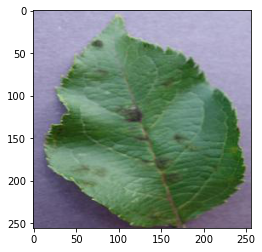

In [34]:
# random images 
show_image(*train[0])



Label :Apple___healthy(3)


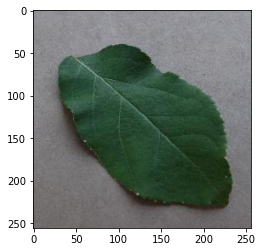

In [35]:
show_image(*train[6000])

Label :Apple___Black_rot(1)


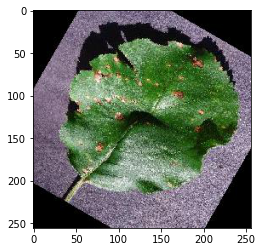

In [33]:
show_image(*train[2500])

In [38]:
# Setting the seed value
random_seed = 8
torch.manual_seed(random_seed)

# setting the batch size( input size of CNN)
batch_size = 33

In [39]:
# DataLoaders for training and validation
train_dl = DataLoader(train, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(valid, batch_size, num_workers=2, pin_memory=True)